In [2]:
import numpy as np
from random import choices, randrange
import random
import matplotlib.pyplot as plt
from numba import njit
from random import randint
from sklearn.datasets import make_blobs

def init_population(n_ind, N, K):
    pop = []
    for i in range(n_ind):
        pop.append(np.random.randint(K, size = N))
    return pop


@njit
def eval_sol(sol, K, problem):
    centroids = np.zeros((K,2))
    num_elems = np.zeros(K)
    for elem,cluster in enumerate(sol):
        cluster = int(cluster)
        elem = int(elem)
        centroids[cluster] = centroids[cluster] + problem[elem]
        num_elems[cluster] = num_elems[cluster] + 1

    for i in range(len(centroids)):
        centroids[i] = centroids[i]/num_elems[i]
    
    tot_distance = 0

    for elem,cluster in enumerate(sol):
        cluster = int(cluster)
        elem = int(elem)
        tot_distance = np.linalg.norm( centroids[cluster] - problem[elem] ) + tot_distance

    return tot_distance


@njit
def breed_sol(parent1, parent2, K, b):
    nPoints = len(parent1)
    child1 = np.zeros(nPoints)
    child2 = np.zeros(nPoints)
    n = randrange(nPoints-1)
    child1[:n] = parent1[:n]
    child1[n+1:] = parent2[n+1:]

    child2[:n] = parent2[:n]
    child2[n+1:] = parent1[n+1:]

    for i in range(len(child1)):
        r = random.uniform(0,1)
        if(r < b):
            child1[i] = randrange(K)

    for i in range(len(child2)):
        r = random.uniform(0,1)
        if(r < b):
            child2[i] = randrange(K)
    return child1, child2



def genetic_clustering(problem, K):
    N = 100
    nPoints = len(problem)
    population = init_population(N, nPoints, K)
    
    best_fitness = -1
    
    best_solution = population[0]

    no_changes = 0
    gen = 0
    finito = False
    while(finito == False):
        old_best = best_fitness
        vals = np.zeros(N)
        for i,elem in enumerate(population):
            vals[i] = eval_sol(elem,K,points)
            if vals[i]<best_fitness or best_fitness == -1:
                best_fitness = vals[i]
                best_solution = elem
            
        if(old_best == best_fitness):
            no_changes = no_changes+1
        else:
            no_changes = 0

        min_val = np.min(vals)
        av_vals = np.sum(vals)/len(vals)
        print("Generation number: {}, Best fitness: {}, Average fitness: {}".format(gen, min_val, av_vals))

        new_pop = []
        
        sorted_pop = [x for _, x in sorted(zip(vals, population),  key=lambda pair: pair[0])]


        to_breed = np.arange(round(N/4))

        for i in range(round(N/4)):
            parent1 = np.random.randint(round(N/4))
            parent2 = np.random.randint(round(N/4))
            while parent1 == parent2:
                parent2 = np.random.randint(round(N/4))
            new_pop.append(breed_sol(sorted_pop[parent1], sorted_pop[parent2], K, 0.01))
        
        saved_pop = []
        for i in range(round(N/4)):
            saved_pop.append(sorted_pop[i])
        
        to_save = np.arange(round(N/4), N)
        for i in range(round(N/4)):
            saved = np.randint(len(to_save))
            to_save = np.delete(to_save, saved)
            saved_pop.append(sorted_pop[saved])

        new_pop.extend(saved_pop)
        population = new_pop
        gen = gen + 1

        if(no_changes == 50):
            return best_solution


In [3]:
def load_points(file):
    f = open(file, 'r')
    points = []

    for i,line in enumerate(f.readlines()):
        nums = line.split(" ")
        coords = []
        for num in nums:
            if num != "":
                coords.append(float(num))
        coords = np.array(coords)
        points.append(coords)

    points = np.array(points)
    f.close()
    return points

In [4]:
#points = load_points('C:/Users/franc/Desktop/prova.txt')

points, centroids = make_blobs(n_samples=500, centers=5, n_features=2, random_state=2)

K = 5
N = len(points)
sol = genetic_clustering(points, K)

Generation number: 0, Best fitness: 2067.958882075063, Average fitness: 2077.8671435606248
Generation number: 1, Best fitness: 2065.8720324037204, Average fitness: 2075.2287593077735
Generation number: 2, Best fitness: 2063.5780690255374, Average fitness: 2073.5701322971327
Generation number: 3, Best fitness: 2055.006968786574, Average fitness: 2071.5486600130293
Generation number: 4, Best fitness: 2055.006968786574, Average fitness: 2070.162471496538
Generation number: 5, Best fitness: 2055.006968786574, Average fitness: 2068.9166049613877
Generation number: 6, Best fitness: 2050.1691534220063, Average fitness: 2067.6574883336066
Generation number: 7, Best fitness: 2050.1691534220063, Average fitness: 2065.6242694520356
Generation number: 8, Best fitness: 2050.1691534220063, Average fitness: 2063.3342234515308
Generation number: 9, Best fitness: 2047.100721578249, Average fitness: 2062.120723934406
Generation number: 10, Best fitness: 2047.100721578249, Average fitness: 2060.215595638

In [10]:
print(N)

500


TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1m[1mNo implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(Tuple(array(float64, 2d, C), Literal[int](2)))
 
There are 2 candidate implementations:
[1m   - Of which 2 did not match due to:
   Overload of function 'zeros': File: numba\core\typing\npydecl.py: Line 504.
     With argument(s): '(Tuple(array(float64, 2d, C), int64))':[0m
[1m    No match.[0m
[0m
[0m[1mDuring: resolving callee type: Function(<built-in function zeros>)[0m
[0m[1mDuring: typing of call at C:\Users\franc\AppData\Local\Temp\ipykernel_4456\2620761330.py (18)
[0m
[1m
File "..\..\..\..\AppData\Local\Temp\ipykernel_4456\2620761330.py", line 18:[0m
[1m<source missing, REPL/exec in use?>[0m


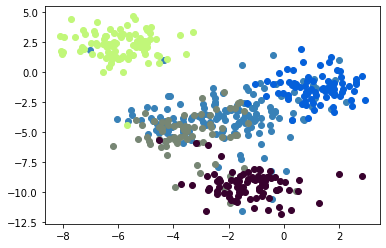

In [9]:
colors = []
for i in range(K):
    colors.append('#%06X' % randint(0, 0xFFFFFF))


clusters = []

for i in range(K):
    cluster = []
    for j in range(N):
        if(sol[j]==i):
            cluster.append(points[j].copy())
    cluster = np.array(cluster)
    clusters.append(cluster)


for i in range(K):
    to_draw = clusters[i]
    plt.scatter(to_draw[:,0], to_draw[:,1], color = colors[i])

print("{:.5E}".format(eval_sol(sol, points, K)))